# Correlação e Regressão

### Importações

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Base de Dados

In [2]:
tamanho = np.array([30,39,49,60])
preco = np.array([57000,69000,77000,90000])

In [3]:
df = pd.DataFrame({'tamanho':tamanho, 'preco':preco})
df

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
media_t = df['tamanho'].mean()
desvio_t = df['tamanho'].std()

In [5]:
media_p = df['preco'].mean()
desvio_p = df['preco'].std()

In [6]:
media_t, desvio_t

(44.5, 12.922847983320086)

In [7]:
media_p, desvio_p

(73250.0, 13865.424623862047)

### Correlação - Cálculo manual 

#### Covariância

In [8]:
df['dif'] = (df['tamanho'] - media_t) * (df['preco'] - media_p)
df

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [9]:
covariancia = df['dif'].sum() / (df.shape[0] - 1)
covariancia

178500.0

#### Coeficiente de correlação

In [10]:
cof_corr = covariancia / (desvio_t * desvio_p)
cof_corr

0.9962006267707775

#### Coeficiente de determinação

In [11]:
cof_dert = math.pow(cof_corr, 2)
cof_dert

0.9924156887784898

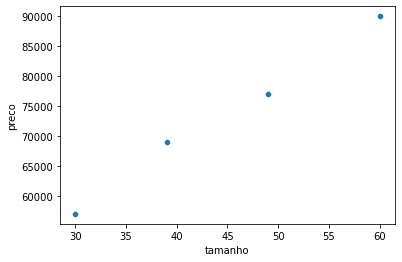

In [12]:
sns.scatterplot(x = 'tamanho', y = 'preco', data=df);

#### Correlação - cálculo com Numpy e Pandas

In [13]:
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [14]:
df.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [15]:
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [16]:
df.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


### Regressão

In [18]:
df = pd.read_csv('../../dados/house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
df = df.iloc[:, 2:]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


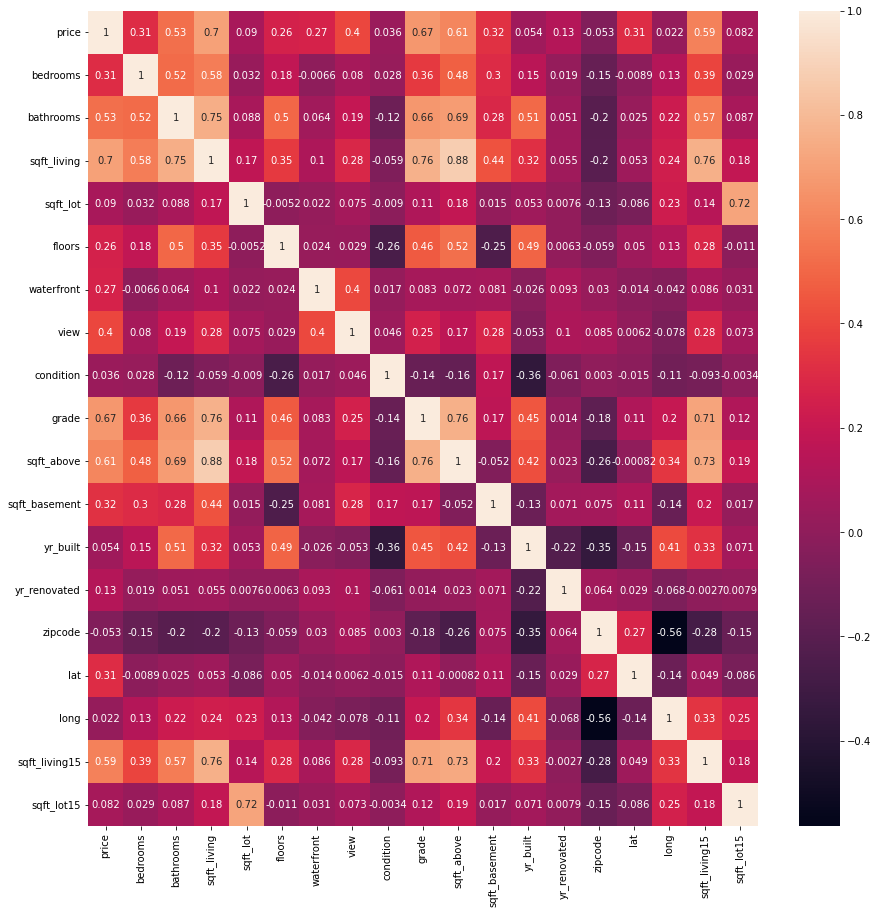

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(df.corr(), annot=True)

In [21]:
math.pow(0.7, 2)

0.48999999999999994

#### Regressão linear simples

In [26]:
X = df['sqft_living'].values
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [27]:
y = df['price'].values

In [28]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X_treino.shape, X_teste.shape

((17290, 1), (4323, 1))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression()

In [37]:
#b0
regressor.intercept_

-30186.36106105463

In [38]:
#b1
regressor.coef_

array([273.82181112])

In [42]:
regressor.predict(np.array([[900]]))

array([216253.26894848])

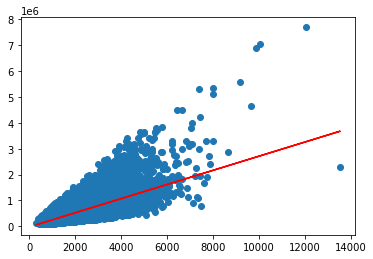

In [44]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red');

In [45]:
regressor.score(X_treino, y_treino)

0.48876078213887486

In [46]:
regressor.score(X_teste, y_teste)

0.5033019006466926

#### Métricas de erros

In [47]:
previsoes = regressor.predict(X_teste)

In [48]:
previsoes, y_teste

(array([ 733776.4919685 ,  416143.19106732,  618771.33129738, ...,
         449001.80840193, 1412854.58355032,  380546.3556215 ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
mean_absolute_error(y_teste, previsoes)

178578.01159005202

In [52]:
mean_squared_error(y_teste, previsoes)

85730574276.16483

In [53]:
math.sqrt(mean_squared_error(y_teste, previsoes))

292797.83857836935

### Regressão linear múltipla

In [55]:
X = df[['bedrooms', 'sqft_living', 'grade', 'sqft_above']].values
X

array([[   3, 1180,    7, 1180],
       [   3, 2570,    7, 2170],
       [   2,  770,    6,  770],
       ...,
       [   2, 1020,    7, 1020],
       [   3, 1600,    8, 1600],
       [   2, 1020,    7, 1020]], dtype=int64)

In [56]:
y = df['price']

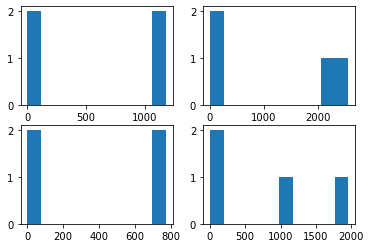

In [62]:
f, ax  = plt.subplots(2,2)
ax[0,0].hist(X[0])
ax[0,1].hist(X[1])
ax[1,0].hist(X[2])
ax[1,1].hist(X[3]);

In [66]:
y = np.log(y)

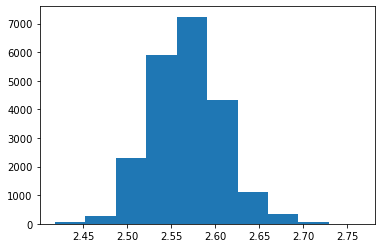

In [67]:
plt.hist(y);

In [74]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [75]:
regressor = LinearRegression()
regressor.fit(X_treino, y_treino)

LinearRegression()

In [76]:
regressor.score(X_treino, y_treino)

0.5527792813742313

In [77]:
regressor.score(X_teste, y_teste)

0.5753309121329361

In [78]:
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

0.02123549085326425